In [71]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [72]:
class PCA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.eigen_components = None
    self.mean = None

  def fit(self, X):
    self.mean = np.mean(X, axis =0) #column wise
    print("self.mean",self.mean)

    #mean
    X -=self.mean

    #covariance
    cov= np.cov(X.T)

    #eigenvector, eigenvalue
    eigen_values, eigen_vector = np.linalg.eig(cov)

    eigen_vector = eigen_vector.T #coz we get eigen vector in column matrix

    #taking decreasing sorted index of eigen values
    index = np.argsort(eigen_values)[::-1]
    eigenvalues = eigen_values[index]
    eigenvector = eigen_vector[index]

    #getting top n eigen components
    self.eigen_components = eigenvector[0:self.n_components]

  def transform(self, X):
    X -= self.mean
    return np.dot(X, self.eigen_components.T)



In [73]:
dataset = datasets.load_iris()

In [74]:
X = dataset.data
Y = dataset.target

In [75]:
X.shape

(150, 4)

# change this 4 dimensional data to 2 dimension

In [76]:
pca = PCA(2)
pca.fit(X)
result = pca.transform(X)

self.mean [5.84333333 3.05733333 3.758      1.19933333]


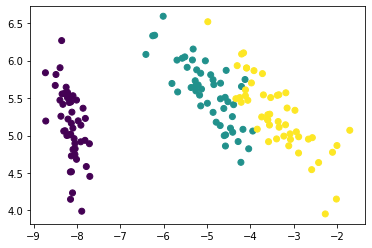

In [81]:
plt.scatter(result[:,0],result[:,1], c=Y)
